這是一個完整的 CNN 模型訓練過程，使用 TensorFlow 和 Keras 在 MNIST 手寫數字資料集上進行圖像分類。接下來的步驟是將這個 CNN 模型作為 API 部署，使用 FastAPI，並讓客戶端上傳圖片進行分類預測。

我會幫你分成兩部分：

1. **訓練並保存模型**：
   首先，我們要訓練模型並保存它，以便後續用於 API 中的推理。

2. **使用 FastAPI 部署模型**：
   我會將你提供的 TensorFlow 模型整合到 FastAPI 中，讓它能夠接收圖像進行推理，並返回分類結果。

### 部分 1：訓練並保存模型

在訓練好模型之後，你可以將模型保存為 `.h5` 文件，供後續使用。

```python
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# 下載並預處理 MNIST 資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255.0

# 建立 CNN 模型
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
model.fit(x_train, y_train, epochs=10, batch_size=64)

# 保存模型
model.save('mnist_cnn_model.h5')

# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
```

這樣你會在當前工作目錄下得到 `mnist_cnn_model.h5` 文件，這個文件可以用於後續的推理。

### 部分 2：使用 FastAPI 部署模型

接下來，將已保存的模型加載進來，並將其部署成 API。以下是整合 FastAPI 的步驟，讓用戶能上傳圖片，並獲得模型預測結果。

```python
from fastapi import FastAPI, UploadFile, File
import uvicorn
import tensorflow as tf
from PIL import Image
import numpy as np
import io

# 初始化 FastAPI 應用
app = FastAPI()

# 載入已保存的 CNN 模型
model = tf.keras.models.load_model('mnist_cnn_model.h5')

# 定義一個端點來接受圖片並進行推理
@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    # 讀取上傳的圖片
    image = Image.open(io.BytesIO(await file.read())).convert('L')  # 轉為灰階
    image = image.resize((28, 28))  # 調整大小到 28x28

    # 預處理圖片
    image_np = np.array(image).reshape(1, 28, 28, 1) / 255.0

    # 模型推理
    predictions = model.predict(image_np)
    predicted_label = np.argmax(predictions, axis=1)[0]

    # 返回分類結果
    return {"predicted_label": int(predicted_label)}

# 運行 FastAPI 應用
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)
```

### 使用說明

1. **載入模型**：這裡我們通過 `tf.keras.models.load_model('mnist_cnn_model.h5')` 載入保存的模型。
2. **圖片處理**：使用 PIL 將上傳的圖片轉換為灰階並縮放到 28x28 大小，然後轉換為數組，準備進行推理。
3. **模型推理**：將處理好的圖片數據送入模型進行預測，返回預測類別（0-9）。

這樣，你就可以通過 FastAPI 接收圖片，進行分類並返回結果了。

---

### 執行 FastAPI 程式

### 如何透過網址驗證 FastAPI 程式？

假設你已經成功啟動了 FastAPI，並且應用程式正在監聽 `http://localhost:8000`，你可以按照以下步驟進行驗證：

1. **使用瀏覽器測試**：
   - 打開瀏覽器，訪問 `http://localhost:8000/docs`，這是 FastAPI 自動生成的 API 文檔介面，你可以在這裡測試 `POST` 請求，並上傳一張圖片進行預測。

---

### 輸出結果 樣本一

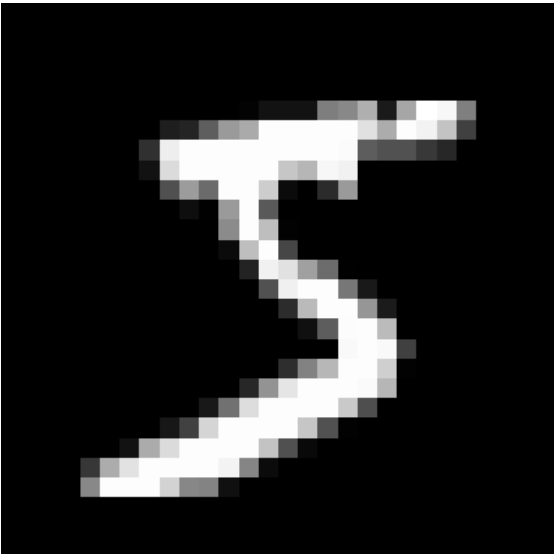

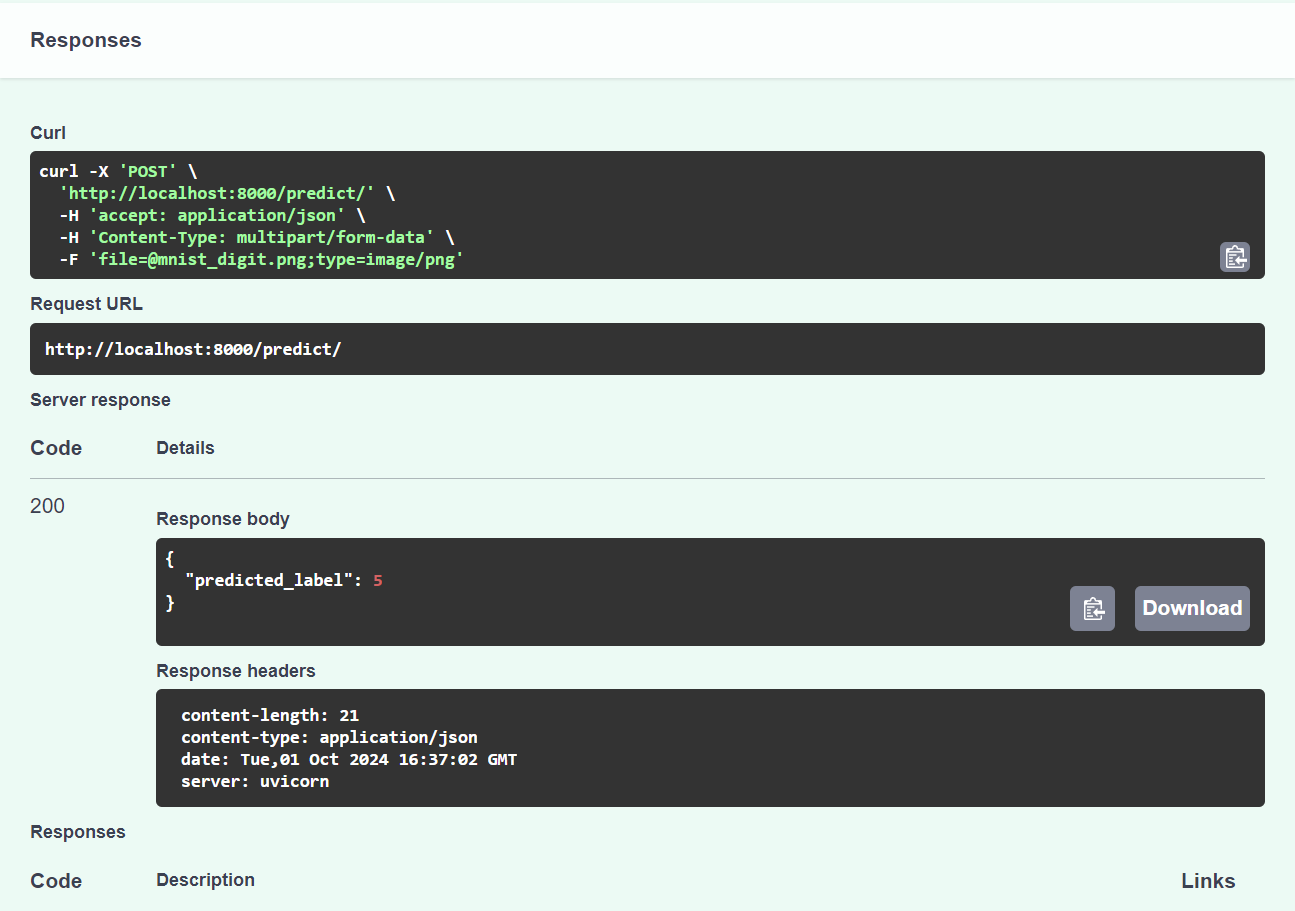

---

### 輸出結果 樣本二

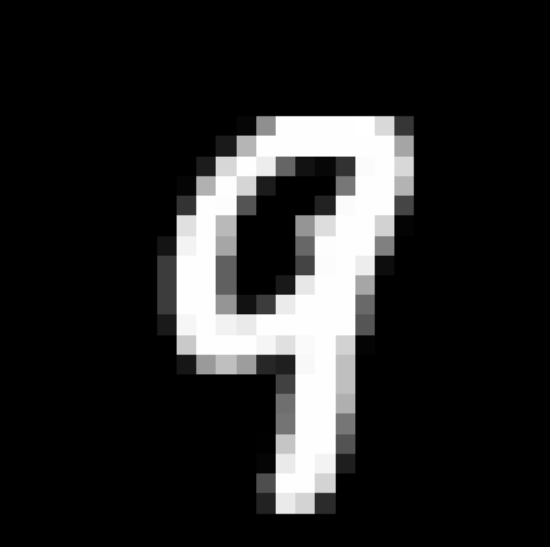

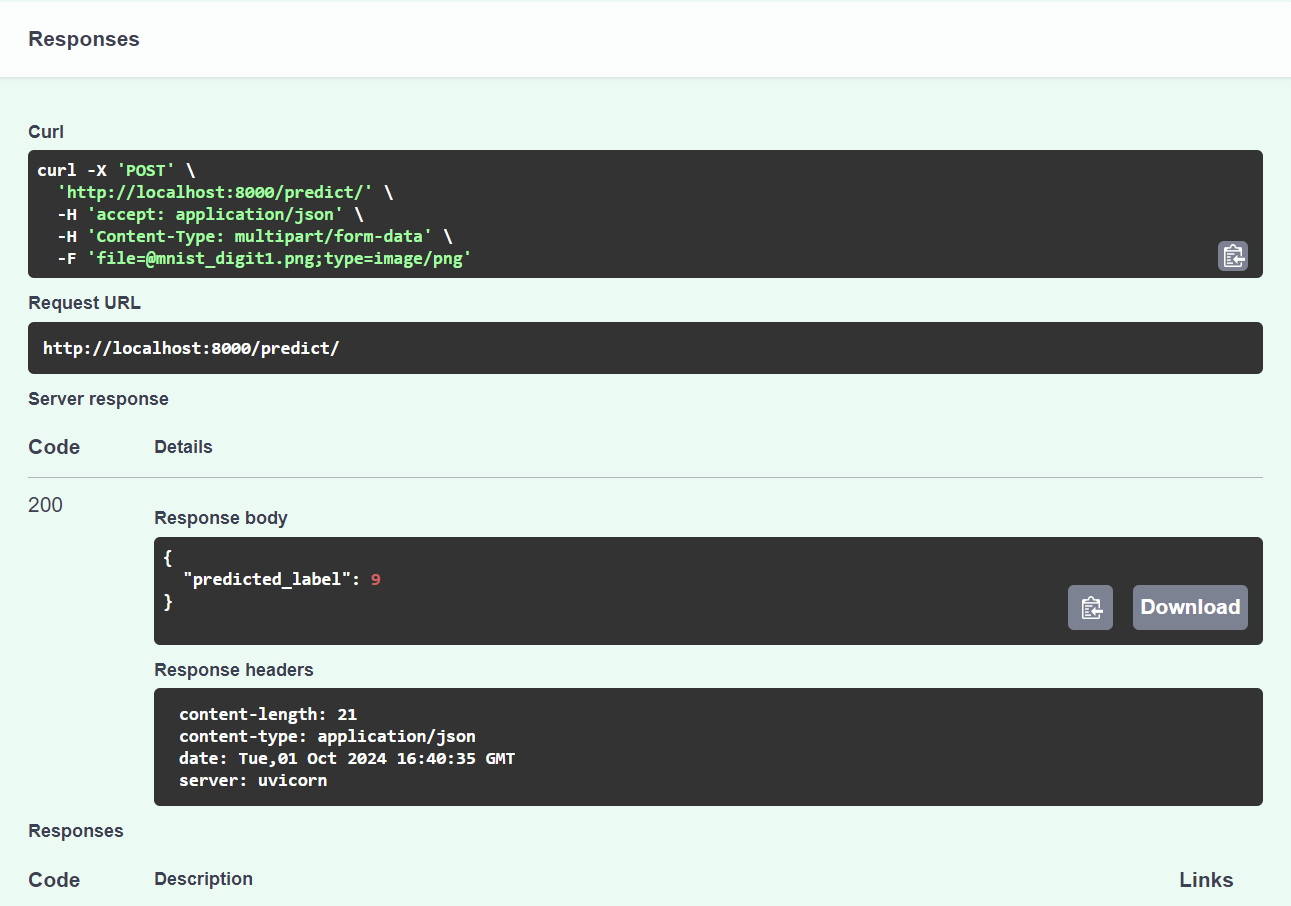

---